In [223]:
%pylab inline
from pyspark.sql import SQLContext
from pyspark.sql.types import *  
import seaborn
import matplotlib.pyplot as plt
import IPython
import numpy

Populating the interactive namespace from numpy and matplotlib


In [224]:
sqlContext = SQLContext(sc)
dataFile = sc.textFile("/user/root/analytic_out/part-r-00000")
header = dataFile.first()
fields = [StructField(field_name, StringType(), True) for field_name in header.split('|')]
fields[0].dataType = StringType()
fields[1].dataType = FloatType()
fields[2].dataType = FloatType()
fields[3].dataType = FloatType()
fields[4].dataType = FloatType()
fields[5].dataType = FloatType()
fields[6].dataType = FloatType()
fields[7].dataType = FloatType()
fields[8].dataType = FloatType()
fields[9].dataType = FloatType()
schema = StructType(fields)
dataHeader = dataFile.filter(lambda l: "id" in l)
dataHeader.collect()
dataNoHeader = dataFile.subtract(dataHeader)
data_temp = dataNoHeader.map(lambda k: k.split("|")).map(lambda p: ( p[0], float(p[1]), float(p[2]), float(p[3]), float(p[4]), float(p[5]), float(p[6]), float(p[7]), float(p[8]), float(p[9]) )
)
data_df = sqlContext.createDataFrame(data_temp, schema)
data_df.printSchema()
data_df.registerTempTable("data")

root
 |-- id	YEAR: string (nullable = true)
 |-- NETWORK: float (nullable = true)
 |-- LABOREXP: float (nullable = true)
 |-- STAFF: float (nullable = true)
 |-- ELECEXP: float (nullable = true)
 |-- KWH: float (nullable = true)
 |-- TOTCOST: float (nullable = true)
 |-- LABOR: float (nullable = true)
 |-- ELEC: float (nullable = true)
 |-- CAPITAL: float (nullable = true)



[5686.0, 3916.0, 14455.0, 85182.0, 59759.0, 12305.0, 27501.0, 100718.0, 21510.0, 21935.0, 13589.0, 56395.0, 10439.0, 46670.0, 23544.0, 376997.0, 20212.0, 56056.0, 24762.0, 23637.0, 24537.0, 14240.0, 55624.0, 25571.0, 32171.0, 13107.0, 39085.0, 21189.0, 13324.0, 65909.0, 7108.0, 23048.0, 15041.0, 23948.0, 24523.0, 43396.0, 27857.0, 71231.0, 16407.0, 8233.0, 3898.0, 9800.0, 113692.0, 63139.0, 12275.0, 102192.0, 53857.0, 32100.0, 17450.0, 11234.0, 113550.0, 374837.0, 32318.0, 6209.0, 13326.0, 26268.0, 91036.0, 4013.0, 13068.0, 17452.0, 87211.0, 7351.0, 20861.0, 13060.0, 49204.0, 13810.0, 43979.0, 53804.0, 18845.0, 22820.0, 22370.0, 23170.0, 23654.0, 100694.0, 84030.0, 20388.0, 17088.0, 23138.0, 74905.0, 11411.0, 18363.0, 15128.0, 64026.0, 98666.0, 17447.0, 75241.0, 99941.0, 75027.0, 76152.0, 12212.0, 27024.0, 25074.0, 39080.0, 29658.0, 19883.0, 23608.0, 46691.0, 24167.0]
100718.0


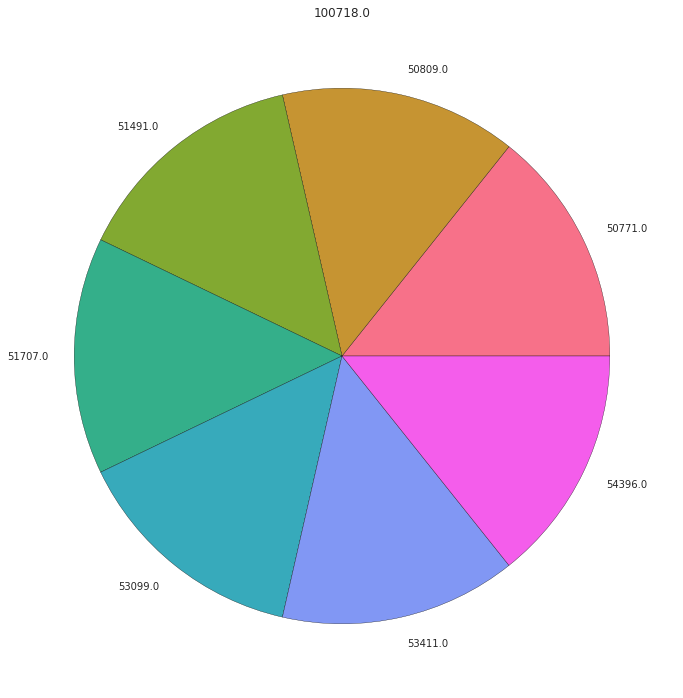

In [225]:
counts = sqlContext.sql( """select `NETWORK`, `TOTCOST`, count(*)  from data group by `NETWORK`, `TOTCOST` """).collect()

# fetch distinct categories of network and totalcosts
n_types = sqlContext.sql("select distinct `NETWORK` from data").rdd.map(lambda x:x[0]).collect()
totalcosts = sqlContext.sql("select distinct `TOTCOST` from data").rdd.map(lambda x:x[0]).collect()

print n_types

nt = n_types[7]
print nt

# retrieve the aggregates for the selected network type, visualize as pie-chart
totalcosts = {totalcost:cnt for n_type, totalcost, cnt in counts if n_type==nt}
labels = sorted(totalcosts.keys())
sizes = [totalcosts[key] for key in labels]
pcolors = seaborn.color_palette( "husl",n_colors = len(labels) )
plt.figure(figsize=(12,12))
plt.pie(sizes, labels=labels, colors=pcolors)
plt.title(nt)
# below we see the distinct networks, the pie is the total for all the totalcosts for the selected network

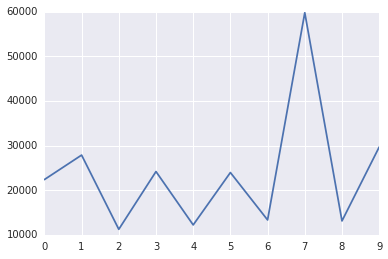

In [228]:
plot_data = counts[:10]
plot_data
# rows = sorted(list(set([x[0] for x in counts])))
# cols = sorted(list(set([x[1] for x in counts])))
lplot = pylab.plot([x[0] for x in plot_data])